# モジュールのロード

In [1]:
import tensorflow as tf
import numpy as np

# データのロード

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255
y_train = tf.one_hot(y_train.reshape(len(y_train)), depth=10)
y_test = tf.one_hot(y_test.reshape(len(y_test)), depth=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [3]:
index2label = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

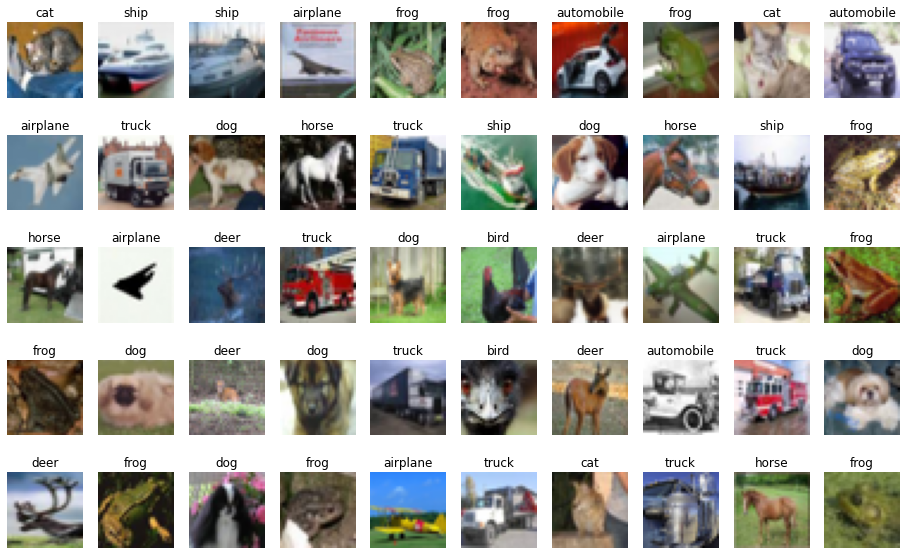

In [4]:
import matplotlib.pyplot as plt
import random

index = 0
count = 50

plt.figure(figsize=(16, 10))

for i, img in enumerate(x_test[index:index+count]):
    plt.subplot(5, 10, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(index2label[np.argmax(y_test[i])])

plt.show()

# ベースモデルでの実行(Dropoutなし)

In [5]:
epochs = 5
batch_size = 256

In [6]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [7]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 3,702,186
Trainable params: 3,702,186
Non-trainable params: 0
______________________________________________

In [8]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 35s 17ms/step - loss: 1.5151 - acc: 0.4616 - val_loss: 1.2014 - val_acc: 0.5742
Epoch 2/5
196/196 [==============================] - 3s 14ms/step - loss: 1.0970 - acc: 0.6149 - val_loss: 1.0331 - val_acc: 0.6348
Epoch 3/5
196/196 [==============================] - 3s 14ms/step - loss: 0.9340 - acc: 0.6741 - val_loss: 0.9753 - val_acc: 0.6587
Epoch 4/5
196/196 [==============================] - 3s 15ms/step - loss: 0.8242 - acc: 0.7138 - val_loss: 0.9275 - val_acc: 0.6775
Epoch 5/5
196/196 [==============================] - 3s 14ms/step - loss: 0.7238 - acc: 0.7492 - val_loss: 0.9473 - val_acc: 0.6676


# Dropoutあり

In [9]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [10]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               3686912   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [11]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 4s 16ms/step - loss: 1.5741 - acc: 0.4340 - val_loss: 1.2588 - val_acc: 0.5550
Epoch 2/5
196/196 [==============================] - 3s 15ms/step - loss: 1.1732 - acc: 0.5859 - val_loss: 1.0682 - val_acc: 0.6248
Epoch 3/5
196/196 [==============================] - 3s 15ms/step - loss: 1.0103 - acc: 0.6432 - val_loss: 0.9999 - val_acc: 0.6489
Epoch 4/5
196/196 [==============================] - 3s 14ms/step - loss: 0.8823 - acc: 0.6890 - val_loss: 0.9599 - val_acc: 0.6640
Epoch 5/5
196/196 [==============================] - 3s 14ms/step - loss: 0.7846 - acc: 0.7262 - val_loss: 0.9092 - val_acc: 0.6834


# Dropout有無での比較

Dropout有無での比較です。

In [12]:
def create_model(input_shape, class_num, is_use_dropout, dropout_rate=0.1):
    if is_use_dropout:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(class_num, activation='softmax'),
        ])
    else:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(class_num, activation='softmax'),
        ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [13]:
epochs = 10
batch_size = 256

is_use_dropouts = [
                False,
                True
]

tf.random.set_seed(0) # 再現性を高めるために乱数シードを固定しています。
histories = []
for is_use_dropout in is_use_dropouts:
    model = create_model(x_train.shape, 10, is_use_dropout, 0.3)

    history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)
    histories.append(history)

Epoch 1/10
196/196 [==============================] - 3s 16ms/step - loss: 1.5261 - acc: 0.4537 - val_loss: 1.2900 - val_acc: 0.5518
Epoch 2/10
196/196 [==============================] - 3s 14ms/step - loss: 1.1302 - acc: 0.6044 - val_loss: 1.0729 - val_acc: 0.6251
Epoch 3/10
196/196 [==============================] - 3s 14ms/step - loss: 0.9645 - acc: 0.6622 - val_loss: 1.0041 - val_acc: 0.6504
Epoch 4/10
196/196 [==============================] - 3s 15ms/step - loss: 0.8449 - acc: 0.7061 - val_loss: 0.9595 - val_acc: 0.6685
Epoch 5/10
196/196 [==============================] - 3s 14ms/step - loss: 0.7260 - acc: 0.7483 - val_loss: 0.9276 - val_acc: 0.6810
Epoch 6/10
196/196 [==============================] - 3s 14ms/step - loss: 0.6328 - acc: 0.7813 - val_loss: 0.9079 - val_acc: 0.6898
Epoch 7/10
196/196 [==============================] - 3s 14ms/step - loss: 0.5237 - acc: 0.8218 - val_loss: 0.9946 - val_acc: 0.6737
Epoch 8/10
196/196 [==============================] - 3s 14ms/step - 

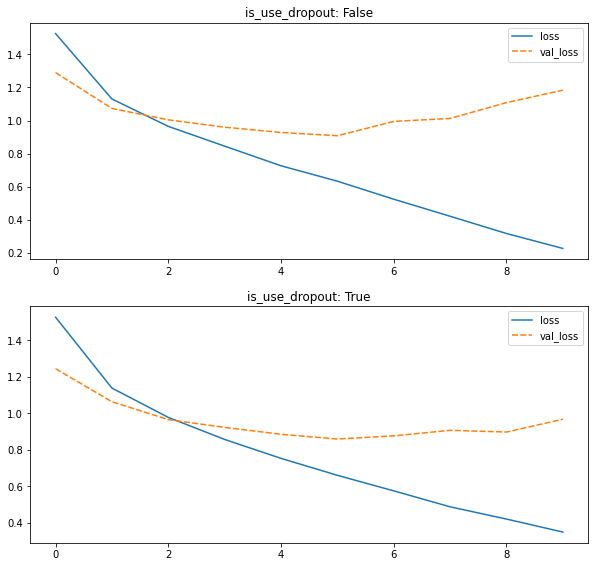

In [14]:
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(10, 20))

for i, history in enumerate(histories):
    ax = fig.add_subplot(4, 1, i + 1)
    
    plot_df = pd.DataFrame(history.history)[['loss', 'val_loss']]
    sns.lineplot(data=plot_df, ax=ax)
    ax.set_title(f'is_use_dropout: {is_use_dropouts[i]}')